# Figure 2 - supplement 4B

In [1]:
# required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('Prediction of spinal cord outgrowth \n for different '+r'$\tau$'+' values', y=1.1, size=65)    
    exp_time = [0, 2, 3, 4, 6, 8]
    exp_outgrowth = [0, 60, 160, 450, 1280, 2260]
    exp_outgrowth_err = [0, 10, 20, 40, 60, 70]
    
    # Experimental outgrowth
    #ax.errorbar(exp_time , exp_outgrowth, yerr=exp_outgrowth_err, color='black',ecolor='black', fmt='o',markersize=11,elinewidth=3, label='Experiments')
    
    ax.legend(loc='upper left', facecolor='white')
    plt.xlabel('Time (days)')
    plt.ylabel('Outgrowth' + ' (' + r'$\mu$'+'m)')
    plt.xlim(-0.2,8.2)
    plt.ylim(-50,2500)
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 32})
    filename = "./" + "Fig_S2B.png"    
    fig.savefig(filename, dpi=300, bbox_inches='tight')    

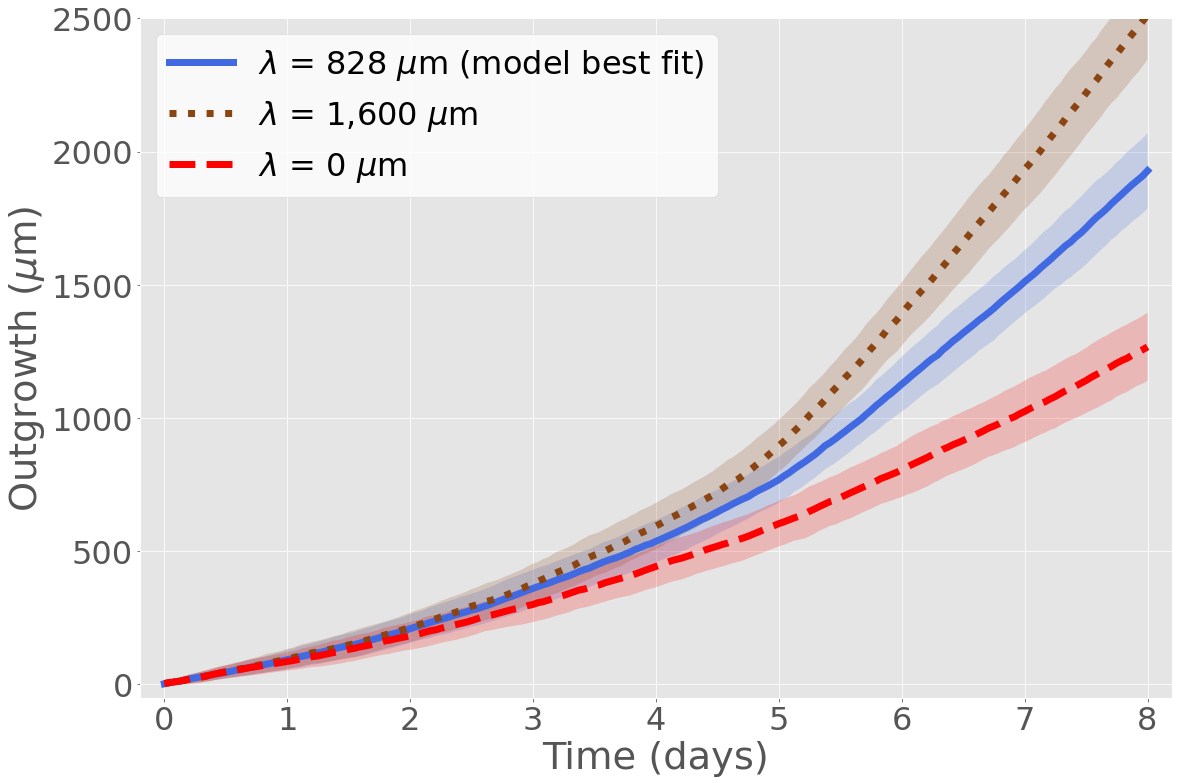

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

ax.plot(time, outgrowth_mean, color='royalblue',linewidth=7, label=r'$\lambda$'+' = 828 '+r'$\mu$'+'m (model best fit)')
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std,linestyle='solid', facecolor='royalblue', alpha=0.2)

#################################

n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean = 1600      # lambda mean
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

ax.plot(time, outgrowth_mean, color='saddlebrown',linewidth=7,linestyle='dotted', label=r'$\lambda$'+' = 1,600 '+r'$\mu$'+'m')
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std, facecolor='saddlebrown', alpha=0.2)


#################################

n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean = 0      # lambda mean
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

ax.plot(time, outgrowth_mean, color='r',linewidth=7,linestyle='dashed', label=r'$\lambda$'+' = 0 '+r'$\mu$'+'m')
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std, facecolor='r', alpha=0.2)


##################################

plot_create()